In [1]:
# Data Wrangling
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
plt.rc("font", family="Malgun Gothic") 
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

In [2]:
df = pd.read_csv('supervised_label_cn7.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
1,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
2,0,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,...,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
3,0,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,...,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
4,0,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,...,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,0,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,...,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6732,0,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,...,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6733,0,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
6734,0,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [4]:
# 데이터 정보 확인
X = df.iloc[:, 1:25]
y = df.iloc[:, :1]

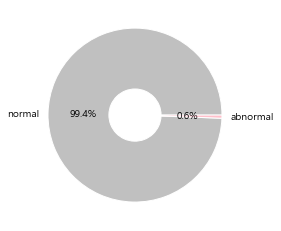

In [5]:
# 데이터 불균형 확인
labels= ['normal','abnormal']
colors = ['silver', 'pink']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.pie(y.value_counts(), labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

In [6]:
# 결측값 파악
X.isnull().sum()

Injection_Time              0
Filling_Time                0
Plasticizing_Time           0
Cycle_Time                  0
Clamp_Close_Time            0
Cushion_Position            0
Plasticizing_Position       0
Clamp_Open_Position         0
Max_Injection_Speed         0
Max_Screw_RPM               0
Average_Screw_RPM           0
Max_Injection_Pressure      0
Max_Switch_Over_Pressure    0
Max_Back_Pressure           0
Average_Back_Pressure       0
Barrel_Temperature_1        0
Barrel_Temperature_2        0
Barrel_Temperature_3        0
Barrel_Temperature_4        0
Barrel_Temperature_5        0
Barrel_Temperature_6        0
Hopper_Temperature          0
Mold_Temperature_3          0
Mold_Temperature_4          0
dtype: int64

In [7]:
df.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,...,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,68.381941,644.899046,55.523085,...,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.648307,42.170577,1.005340,...,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,59.759998,69.639999,38.500000,...,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,...,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,...,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,...,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,68.860001,647.989990,64.800003,...,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


Note: The number of non binary numerical features is very large (23), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


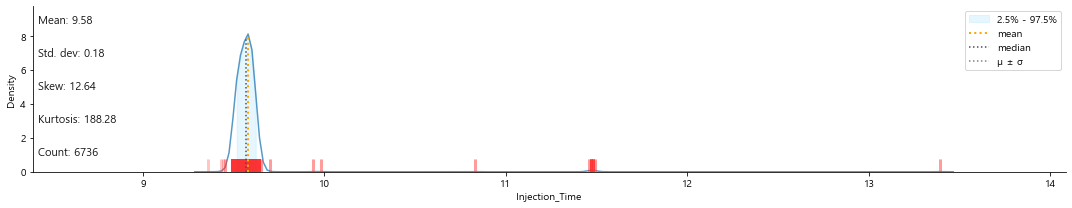

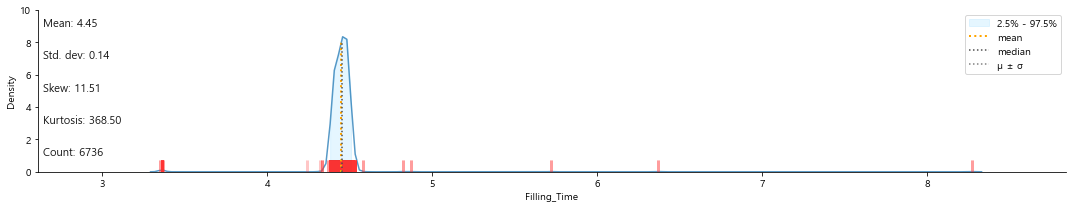

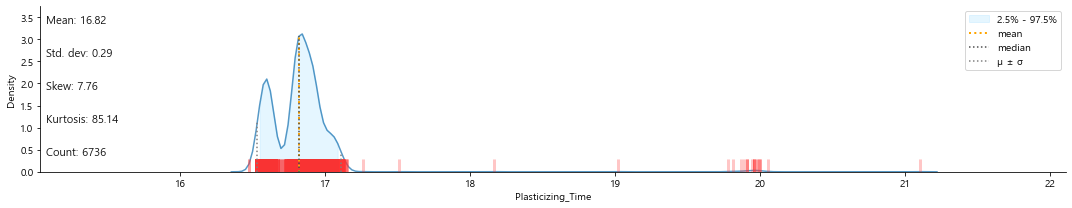

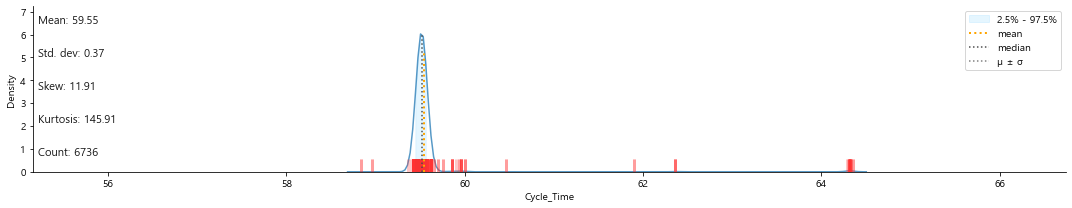

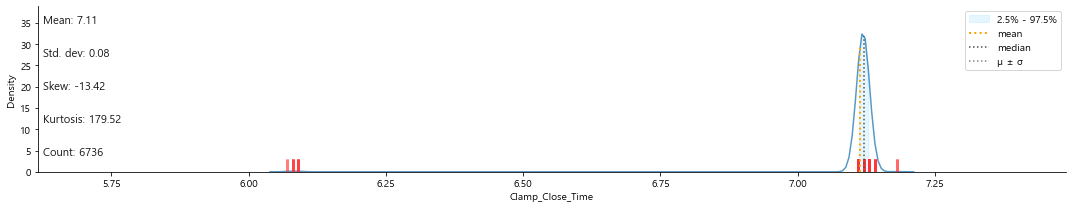

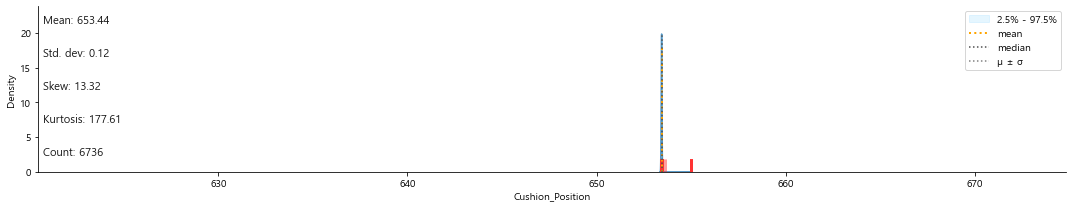

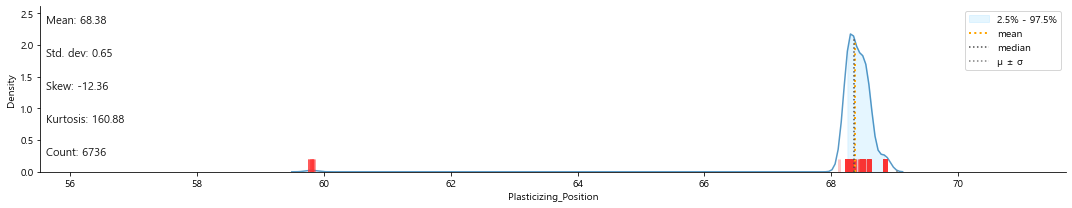

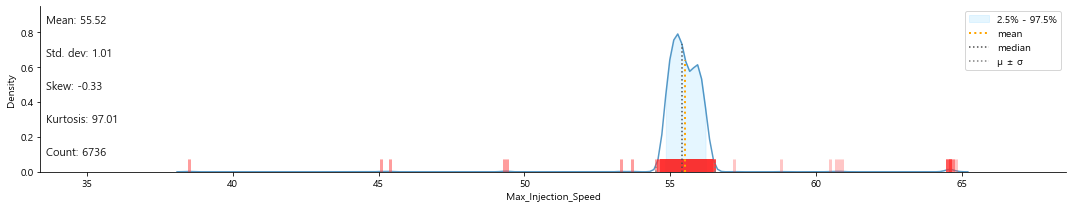

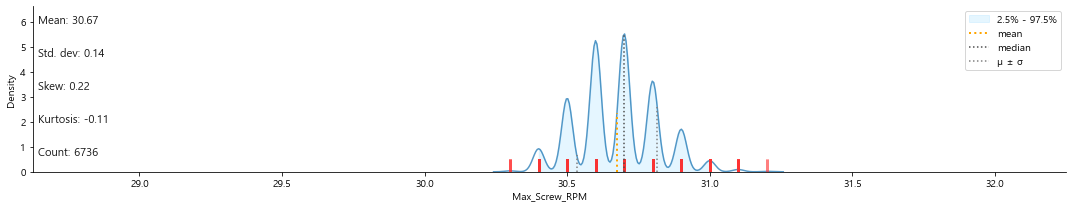

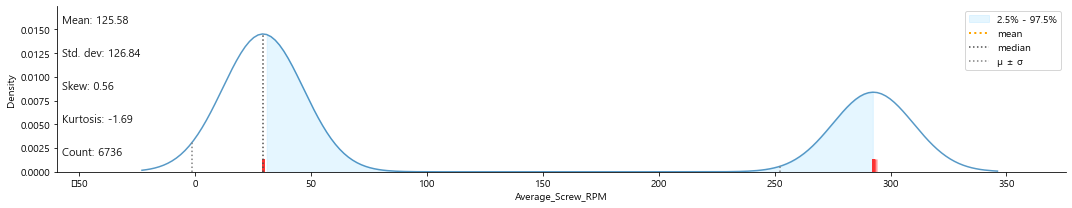

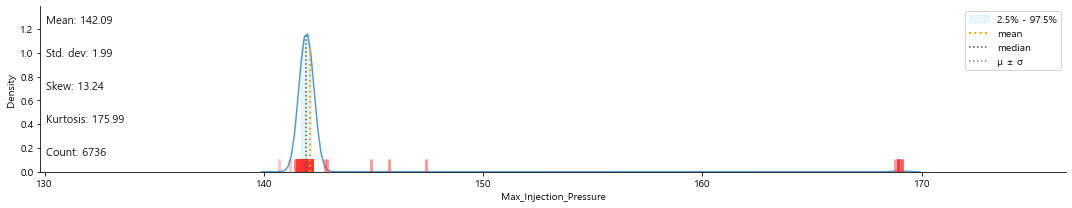

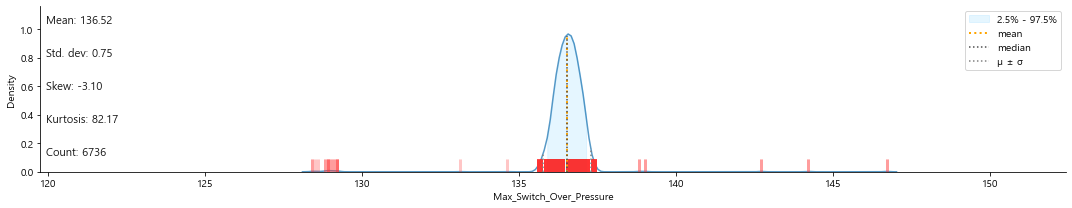

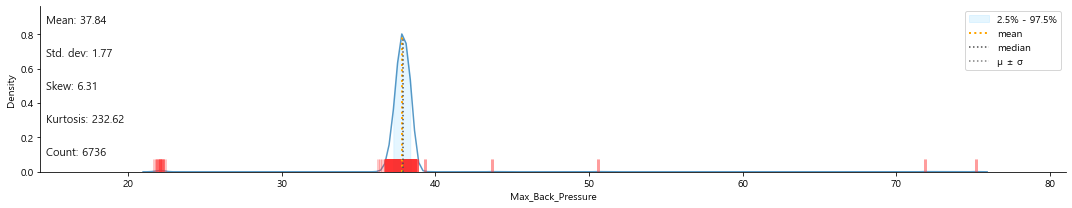

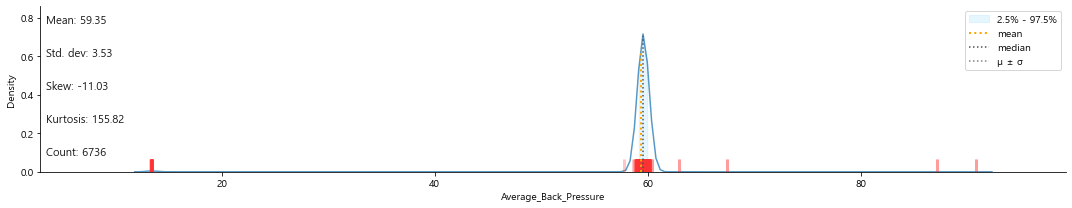

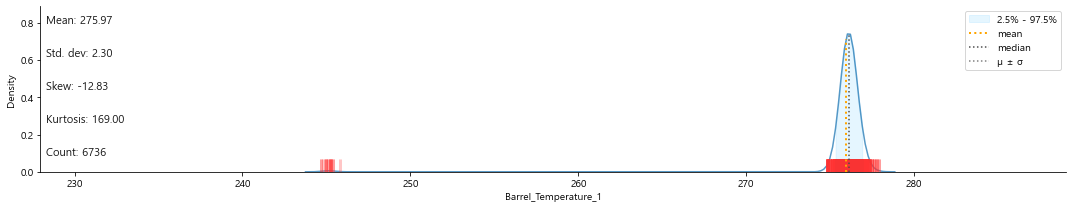

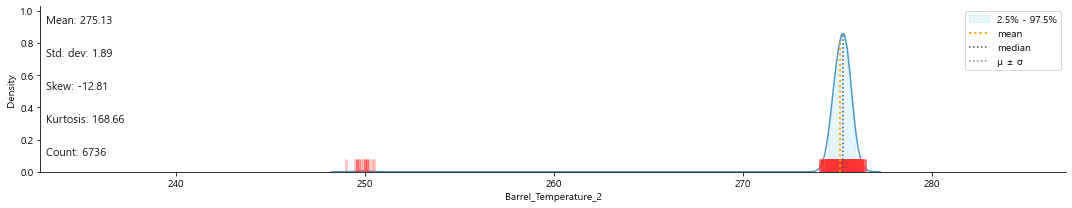

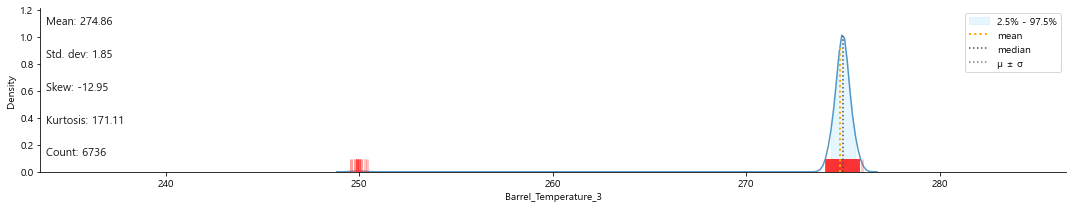

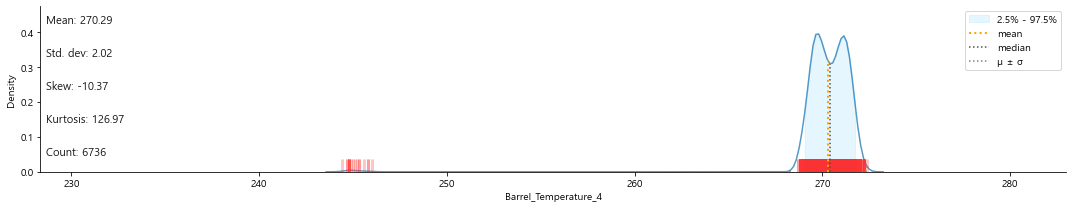

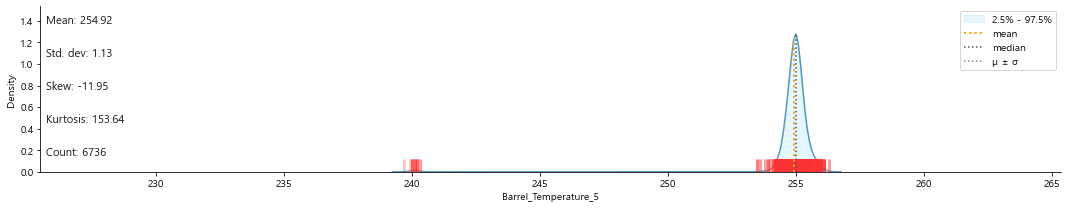

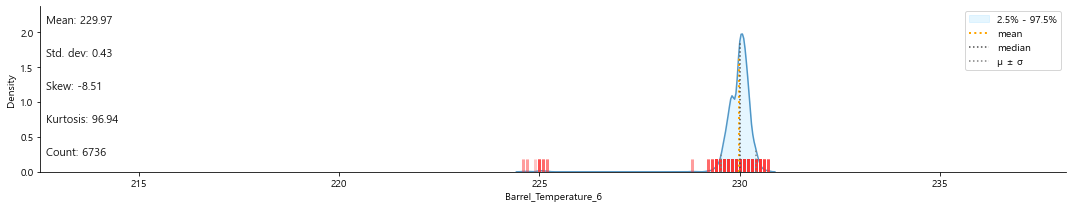

In [8]:
# 수치형 속성 파악(시각화)
klib.dist_plot(X)
plt.show()

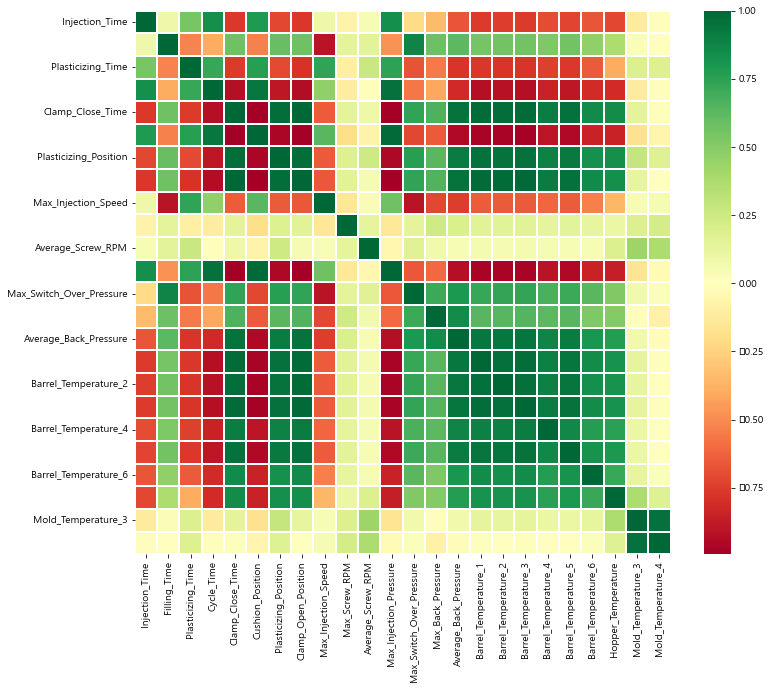

In [9]:
sns.heatmap(X.corr(), cmap='RdYlGn', linewidths=0.2) #titanic.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

# Make Trainset

In [10]:
train = df.query('PassOrFail == 0')

# test_temp1 = train.sample(n=39, random_state=0)
# test_temp2 = df.query('PassOrFail == 1')
# test = pd.concat([test_temp1, test_temp2])

# train = train.drop(test_temp1.index)

train.reset_index(inplace=True, drop=True)
# test.reset_index(inplace=True, drop=True)
                 
print(train.shape)
# print(test.shape)

(6697, 25)


In [11]:
X_train = train.iloc[:,1:25]
y_train = train.iloc[:,:1]

In [12]:
columns = X_train.columns
columns

Index(['Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

## 정상 범주 내 이상값 탐색 EDA
- Train 시킬 정상 데이터를 더욱 정상으로 만들자! 가 핵심.
- 정상 범주 내 제거할 이상값은 휴리스틱하게 IQR 기준 1.5,1.7로 실험할 것.
- 실험 결과, 이상치 제거 안하고도 좋은 결과 보였음.
- 하지만!! LOF, GDE는 성능이 크게 향상됨 -> 따라서 각 알고리즘을 이해하는게 필요함.
## PCA Scatter plot

#### Scaling
- 아래의 scaling은 정상 범주 내 이상치 제거를 위한 scaling임.
- 모델 구축을 위한 scaling 작업이 아님.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(X_train)
df_scaled = scaler.transform(X_train)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
array_pca = pca.fit_transform(df_scaled)
df_pca_2 = pd.DataFrame(data = array_pca, columns=['P1', 'P2'])

In [15]:
print('설명력 :', pca.explained_variance_ratio_)

설명력 : [0.72497317 0.10396149]


P1은 원 데이터 분포의 70% 정도를 설명하는 것으로 확인됨으로 scatter plot이 데이터 분포를 잘 반영할 수 있을 것으로 보임.

In [16]:
df_pca = pd.concat([df_pca_2, y_train], axis=1)
df_pca

,P1,P2,PassOrFail
0,-0.567401,4.017338,0
1,-0.881165,4.336673,0
2,-0.768441,4.279875,0
3,-0.627724,3.897643,0
4,-0.510638,4.005890,0
...,...,...,...
6692,-0.264654,-1.632124,0
6693,-0.244065,-1.497121,0
6694,-0.441033,-1.610055,0
6695,-0.564911,-1.570399,0


<AxesSubplot:xlabel='P1', ylabel='P2'>

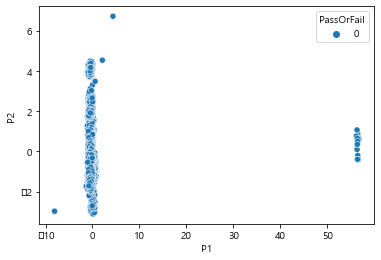

In [17]:
sns.scatterplot(data=df_pca, x='P1', y='P2', hue='PassOrFail')

## n_component = 1로 설정 후 box plot

In [18]:
pca = PCA(n_components=1)
array_pca = pca.fit_transform(df_scaled)
df_pca_1 = pd.DataFrame(data = array_pca, columns=['P1'])

In [19]:
print('설명력 :', pca.explained_variance_ratio_)

설명력 : [0.72497317]


In [20]:
df_pca = pd.concat([df_pca_1, y_train], axis=1)
df_pca

,P1,PassOrFail
0,-0.567401,0
1,-0.881165,0
2,-0.768441,0
3,-0.627724,0
4,-0.510638,0
...,...,...
6692,-0.264654,0
6693,-0.244065,0
6694,-0.441033,0
6695,-0.564911,0


<AxesSubplot:xlabel='P1'>

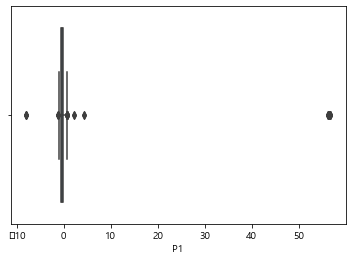

In [21]:
sns.boxplot(x='P1', data=df_pca, hue='PassOrFail')

- 정상 범주 내에도 이상값이 있는 것으로 확인됨.

## IQR 제거

In [22]:
# 이상치 index 저장 함수
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((data<lower_bound)|(data>upper_bound))

In [23]:
outlier = outliers_iqr(df_pca['P1'])[0]
df_pca = df_pca.drop(outlier)
train = train.drop(outlier)

In [24]:
train

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
1,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
2,0,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,...,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
3,0,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,...,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
4,0,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,...,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,0,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,...,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6693,0,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,...,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6694,0,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
6695,0,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [25]:
df_pca

,P1,PassOrFail
0,-0.567401,0
1,-0.881165,0
2,-0.768441,0
3,-0.627724,0
4,-0.510638,0
...,...,...
6692,-0.264654,0
6693,-0.244065,0
6694,-0.441033,0
6695,-0.564911,0


## 제거 후 box plot 확인

<AxesSubplot:xlabel='P1'>

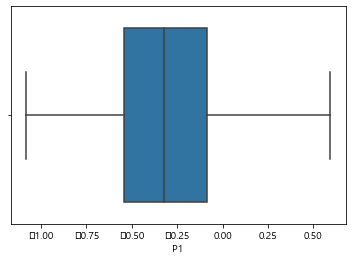

In [26]:
sns.boxplot(x='P1', data=df_pca)

## Train test split

In [27]:
test_temp1 = train.sample(n=39)
test_temp2 = df.query('PassOrFail == 1')
test = pd.concat([test_temp1, test_temp2])

train = train.drop(test_temp1.index)

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

print(train.shape)
print(test.shape)

(6598, 25)
(78, 25)


In [28]:
X_train = train.iloc[:,1:25]
y_train = train.iloc[:,:1]

X_test = test.iloc[:,1:25]
y_test = test.iloc[:,:1]

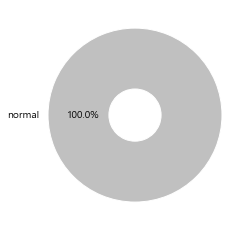

In [29]:
# 데이터 불균형 확인
labels= ['normal']
colors = ['silver', 'pink']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.pie(y_train.value_counts(), labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

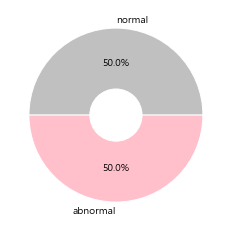

In [30]:
# 데이터 불균형 확인
labels= ['normal','abnormal']
colors = ['silver', 'pink']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.pie(y_test.value_counts(), labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

#### scaling
- 아래 주석 처리된 부분과 같이 scaling 하고 모델 구축하면 성능 현저히 떨어짐.
- 따라서 scaling 안하고 모델 구축 진행함.
- 단, 어떤 이유로 scaling시 성능이 떨어지는지 확인할 것.

In [31]:
# scaler1 = StandardScaler()    
# scaler1.fit(X_train)
# X_train_scaled = scaler1.transform(X_train)

# scaler2 = StandardScaler()    
# scaler2.fit(X_test)
# X_test_scaled = scaler2.transform(X_test)

In [32]:
# X_train = pd.DataFrame(X_train_scaled, columns=columns)

# Modeling

## Isolation Forest

In [33]:
from sklearn.metrics import *
from sklearn.metrics import precision_recall_fscore_support as score

In [34]:
from pyod.models.iforest import IForest

In [35]:
# Isolation Forest 모델 구축
IForest = IForest()  # 28개의 feature를 활용하겠다.
IForest.fit(X_train)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [36]:
# train data에 대한 예측 값(정상=0, 이상=1)
IForest_train_pred = IForest.predict(X_train) 
IForest_test_pred = IForest.predict(X_test) 

accuracy:  0.9358974358974359
recall:  0.949
precision:  0.925
f1-score:  0.937


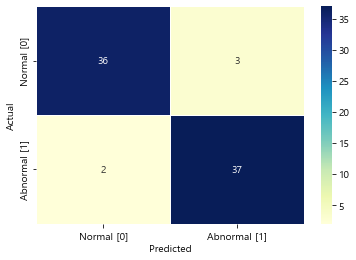

In [37]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, IForest_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, IForest_test_pred))
print("recall: ", round(recall_score(y_test, IForest_test_pred),3))
print("precision: ", round(precision_score(y_test, IForest_test_pred),3))
print("f1-score: ", round(f1_score(y_test, IForest_test_pred),3))

## Local Outlier Factor

In [38]:
from sklearn.neighbors import LocalOutlierFactor

In [39]:
# LOF 모델 구축
LOF = LocalOutlierFactor(contamination=0.1,novelty=True)
LOF.fit(X_train)

LocalOutlierFactor(contamination=0.1, novelty=True)

In [40]:
# train data에 대한 예측 값(정상=1, 이상=-1)
LOF_train_pred = LOF.predict(X_train) 
LOF_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
# LOF는 -1, 1로 예측함 -> 그래서 replace
LOF_test_pred = LOF.predict(X_test) 

LOF_test_pred = pd.DataFrame(LOF_test_pred)
LOF_test_pred = LOF_test_pred.replace({-1: 1, 1: 0})
LOF_test_pred

,0
0,1
1,1
2,1
3,0
4,0
...,...
73,1
74,1
75,1
76,1


accuracy:  0.8076923076923077
recall:  0.718
precision:  0.875
f1-score:  0.789


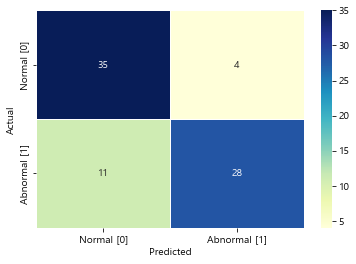

In [42]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, LOF_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, LOF_test_pred))
print("recall: ", round(recall_score(y_test, LOF_test_pred),3))
print("precision: ", round(precision_score(y_test, LOF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, LOF_test_pred),3))

## Gaussian Density Estimation

In [43]:
from sklearn.covariance import EllipticEnvelope

In [44]:
# gaussian 분포를 이용해 Outlier를 검출 모델
gde = EllipticEnvelope()
gde.fit(X_train)

EllipticEnvelope()

In [45]:
# train data에 대한 예측 값(정상=1, 이상=-1)
GDE_train_pred = gde.predict(X_train) 
GDE_train_pred

array([-1, -1, -1, ...,  1,  1,  1])

In [46]:
GDE_test_pred = gde.predict(X_test)
# GDE는 -1, 1로 예측함 -> 그래서 replace

GDE_test_pred = pd.DataFrame(GDE_test_pred)
GDE_test_pred = GDE_test_pred.replace({-1: 1, 1: 0})
GDE_test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
73,1
74,1
75,1
76,1


accuracy:  0.9358974358974359
recall:  0.949
precision:  0.925
f1-score:  0.937


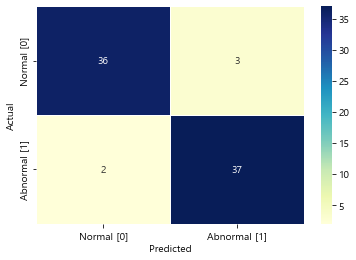

In [47]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, GDE_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, GDE_test_pred))
print("recall: ", round(recall_score(y_test, GDE_test_pred),3))
print("precision: ", round(precision_score(y_test, GDE_test_pred),3))
print("f1-score: ", round(f1_score(y_test, GDE_test_pred),3))

## Autoencoder

In [48]:
import tensorflow as tf

input_dim = X_train.shape[1]

AE = tf.keras.models.Sequential([
    
    # encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),
    
    # decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

AE.compile(optimizer="adam", loss="mse")
AE.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 4)                 100       
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 24)                120       
                                                                 
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = AE.fit(
    X_train,
    X_train,
    epochs=100,
    batch_size=32,
    validation_split=0.3
)

Epoch 1/100
145/145 [==============================] - 1s 3ms/step - loss: 46899.5898 - val_loss: 44478.9375
Epoch 2/100
145/145 [==============================] - 0s 1ms/step - loss: 38835.0703 - val_loss: 28074.2285
Epoch 3/100
145/145 [==============================] - 0s 2ms/step - loss: 27487.5605 - val_loss: 26144.8789
Epoch 4/100
145/145 [==============================] - 0s 2ms/step - loss: 27213.0000 - val_loss: 26144.8789
Epoch 5/100
145/145 [==============================] - 0s 2ms/step - loss: 27213.0000 - val_loss: 26144.8828
Epoch 6/100
145/145 [==============================] - 0s 2ms/step - loss: 27213.0020 - val_loss: 26144.8906
Epoch 7/100
145/145 [==============================] - 0s 1ms/step - loss: 27212.9961 - val_loss: 26144.9316
Epoch 8/100
145/145 [==============================] - 0s 2ms/step - loss: 27212.9961 - val_loss: 26144.8711
Epoch 9/100
145/145 [==============================] - 0s 2ms/step - loss: 27213.0098 - val_loss: 26144.8555
Epoch 10/100
145/14

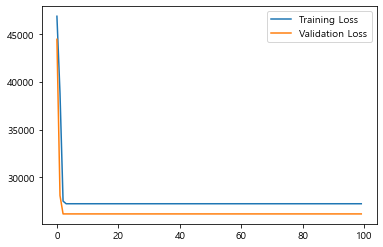

In [50]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [51]:
# train data에 대한 예측 값
AE_train_pred = AE.predict(X_train)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의 -> Novelty Score
train_mse = np.mean(np.power(X_train - AE_train_pred, 2), axis=1)
train_mse = pd.DataFrame({'Reconstruction_error': train_mse})
train_mse

207/207 [==============================] - 0s 829us/step


,Reconstruction_error
0,29162.928017
1,29156.446850
2,29174.998243
3,29168.963886
4,29143.061054
...,...
6593,25578.776864
6594,25587.708597
6595,25565.366870
6596,25602.594170


In [52]:
# train 데이터에 대한 novelty score 기준 상위 10% 의 값을 임계치로 설정
AE_thresh = np.percentile(sorted(train_mse['Reconstruction_error']), 90)
AE_thresh

29167.165586580424

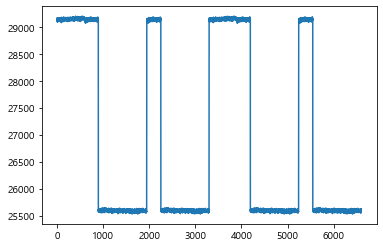

In [53]:
plt.plot(train_mse)

In [54]:
# test data에 대한 예측 값
AE_test_pred = AE.predict(X_test)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의
test_mse = np.mean(np.power(X_test - AE_test_pred, 2), axis=1)
test_mse

3/3 [==============================] - 0s 1ms/step


0     29094.063936
1     29156.905392
2     25577.131069
3     25600.138270
4     29128.179532
          ...     
73    29133.383818
74    29430.678023
75    29238.100394
76    29247.221943
77    29133.974652
Length: 78, dtype: float64

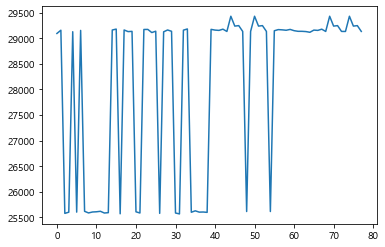

In [55]:
plt.plot(test_mse.values)

In [56]:
# classifier
# AE_thresh 기준, test_mse 값이 더 크면 이상(1), 작으면 정상(0)으로 분류
AE_test_df = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > AE_thresh:
            AE_test_df.append(1)
        else:
            AE_test_df.append(0)

In [57]:
novelty_classifier(test_mse.values)

accuracy:  0.6666666666666666
recall:  0.436
precision:  0.81
f1-score:  0.567


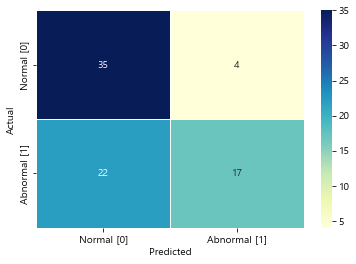

In [58]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, AE_test_df) #confusion_matrix 함수 실행

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, AE_test_df))
print("recall: ", round(recall_score(y_test, AE_test_df),3))
print("precision: ", round(precision_score(y_test, AE_test_df),3))
print("f1-score: ", round(f1_score(y_test, AE_test_df),3))

## OCSVM

In [59]:
from sklearn.svm import OneClassSVM

In [60]:
# Train a tuned local outlier factor model
OCSVM = OneClassSVM(kernel='rbf', nu=0.5, verbose=True)
OCSVM.fit(X_train)

[LibSVM]

OneClassSVM(verbose=True)

In [61]:
OCSVM_train_pred = OCSVM.predict(X_train)

In [62]:
OCSVM_test_pred = OCSVM.predict(X_test)
OCSVM_test_pred = pd.DataFrame(OCSVM_test_pred)
OCSVM_test_pred = OCSVM_test_pred.replace({-1:1, 1:0})

accuracy:  0.6794871794871795
recall:  0.897
precision:  0.625
f1-score:  0.737


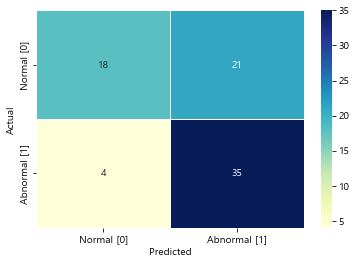

In [63]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, OCSVM_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, OCSVM_test_pred))
print("recall: ", round(recall_score(y_test, OCSVM_test_pred),3))
print("precision: ", round(precision_score(y_test, OCSVM_test_pred),3))
print("f1-score: ", round(f1_score(y_test, OCSVM_test_pred),3))

## K-Nearest_Neighbors

In [64]:
#Hyperparameter
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [66]:
print(g_res.best_score_)
print(g_res.best_params_)

1.0
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


In [67]:
#값을 직접 입력
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [68]:
KNN_train_pred = knn.predict(X_train)
KNN_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
KNN_test_pred = knn.predict(X_test)
KNN_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
#train, test 정확도 확인
print('Training set accuracy: ', metrics.accuracy_score(y_train, KNN_train_pred))
print('Test set accuracy: ',metrics.accuracy_score(y_test, KNN_test_pred))

Training set accuracy:  1.0
Test set accuracy:  0.5


accuracy:  0.5
recall:  0.0
precision:  0.0
f1-score:  0.0


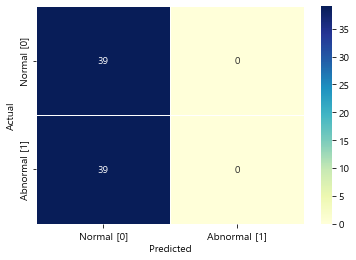

In [72]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, KNN_test_pred) #confusion_matrix 함수 실행

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, KNN_test_pred))
print("recall: ", round(recall_score(y_test, KNN_test_pred),3))
print("precision: ", round(precision_score(y_test, KNN_test_pred),3))
print("f1-score: ", round(f1_score(y_test, KNN_test_pred),3))

## VAE

In [73]:
from pyod.models.vae import VAE
VAE = VAE(encoder_neurons=[64,8], decoder_neurons=[8, 64])
VAE.fit(X)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 24)           600         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 64)           1600        ['dense_5[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['dense_6[0][0]']                
                                                                                              

                                                                                                  
 tf.math.multiply_1 (TFOpLambda  (None,)             0           ['tf.math.reduce_sum[0][0]']     
 )                                                                                                
                                                                                                  
 tf.math.squared_difference (TF  (None, 24)          0           ['tf.convert_to_tensor[0][0]',   
 OpLambda)                                                        'tf.cast[0][0]']                
                                                                                                  
 tf.math.subtract_2 (TFOpLambda  (None,)             0           ['tf.math.multiply_1[0][0]']     
 )                                                                                                
                                                                                                  
 tf.math.r

VAE(batch_size=32, capacity=0.0, contamination=0.1, decoder_neurons=[8, 64],
  dropout_rate=0.2, encoder_neurons=[64, 8], epochs=100, gamma=1.0,
  hidden_activation='relu', l2_regularizer=0.1, latent_dim=2,
  loss=<function mean_squared_error at 0x0000014E6C90D550>,
  optimizer='adam', output_activation='sigmoid', preprocessing=True,
  random_state=None, validation_size=0.1, verbose=1)

In [74]:
# train data에 대한 예측 값(정상=0, 이상=1)
VAE_train_pred = VAE.predict(X_train) 
VAE_train_pred

207/207 [==============================] - 0s 1ms/step


array([1, 1, 1, ..., 0, 0, 0])

In [75]:
# train data에 대한 예측 값(정상=0, 이상=1)
VAE_test_pred = VAE.predict(X_test) 
VAE_test_pred

3/3 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

accuracy:  0.9358974358974359
recall:  0.949
precision:  0.925
f1-score:  0.937


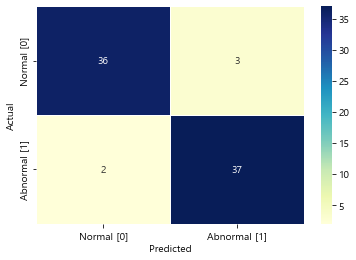

In [76]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, VAE_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, VAE_test_pred))
print("recall: ", round(recall_score(y_test, VAE_test_pred),3))
print("precision: ", round(precision_score(y_test, VAE_test_pred),3))
print("f1-score: ", round(f1_score(y_test, VAE_test_pred),3))